In [2]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

tryb RGB
format JPEG
rozmiar (480, 314)


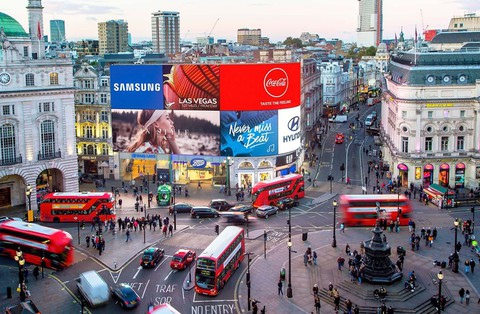

In [3]:
im = Image.open('picadilly.jpg')
print("tryb", im.mode)
print("format", im.format)
print("rozmiar", im.size)
w, h = im.size
im

In [4]:
# tablica obrazu
T = np.array(im)
print("typ danych tablicy obrazu: ", T.dtype)
print("rozmiar elementu tablicy obrazu: ", T.itemsize)
print("rozmiar tablicy obrazu: ", T.shape)

typ danych tablicy obrazu:  uint8
rozmiar elementu tablicy obrazu:  1
rozmiar tablicy obrazu:  (314, 480, 3)


In [5]:
#tablica kanału r
t_r = T[:, :, 0]
print("typ danych tablicy kanału r: ", t_r.dtype)
print("rozmiar elemntu tablicy kanału r: ",t_r.itemsize)
print("rozmiar tablicy kanału r: ",t_r.shape)
im_r = Image.fromarray(t_r) # obraz w odcieniach szarości kanału r
print("tryb kanału r: ", im_r.mode)

#tablica kanału g
t_g = T[:, :, 1]
im_g = Image.fromarray(t_g) # obraz w odcieniach szarości kanału g
#tablica kanału b
t_b = T[:, :, 2]
im_b = Image.fromarray(t_b) # obraz w odcieniach szarości kanału b




typ danych tablicy kanału r:  uint8
rozmiar elemntu tablicy kanału r:  1
rozmiar tablicy kanału r:  (314, 480)
tryb kanału r:  L


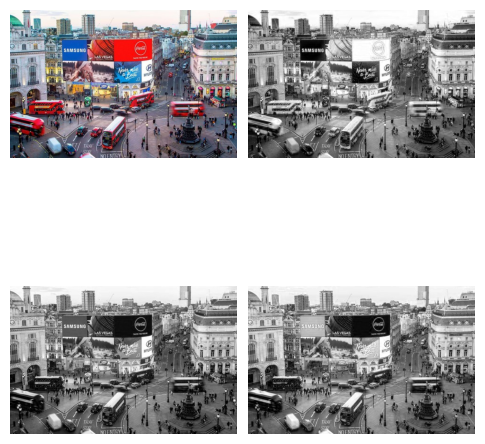

In [6]:
# przedstawienie 4 obrazów w jednym oknie plt
plt.figure(figsize=(6, 7))
plt.subplot(2,2,1) # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.imshow(im)
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(im_r, "gray")
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(im_g, "gray")
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(im_b, "gray")
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('figura1.png')
plt.show()


In [7]:
# Kanały pobrane jako obrazy
r, g, b = im.split()  # powstają obrazy
print("tryb kanału r: ", r.mode)
print("tryb kanału g: ", g.mode)
print("tryb kanału b: ", b.mode)


tryb kanału r:  L
tryb kanału g:  L
tryb kanału b:  L


In [8]:
# porównanie obu metod pozyskania kanałów
# ImageChops.difference daje obraz, kórego piksele powstają
# jako wartość bezwzględna różnicy pikseli

diff_r = ImageChops.difference(r, im_r)
diff_g = ImageChops.difference(g, im_g)
diff_b = ImageChops.difference(b, im_b)



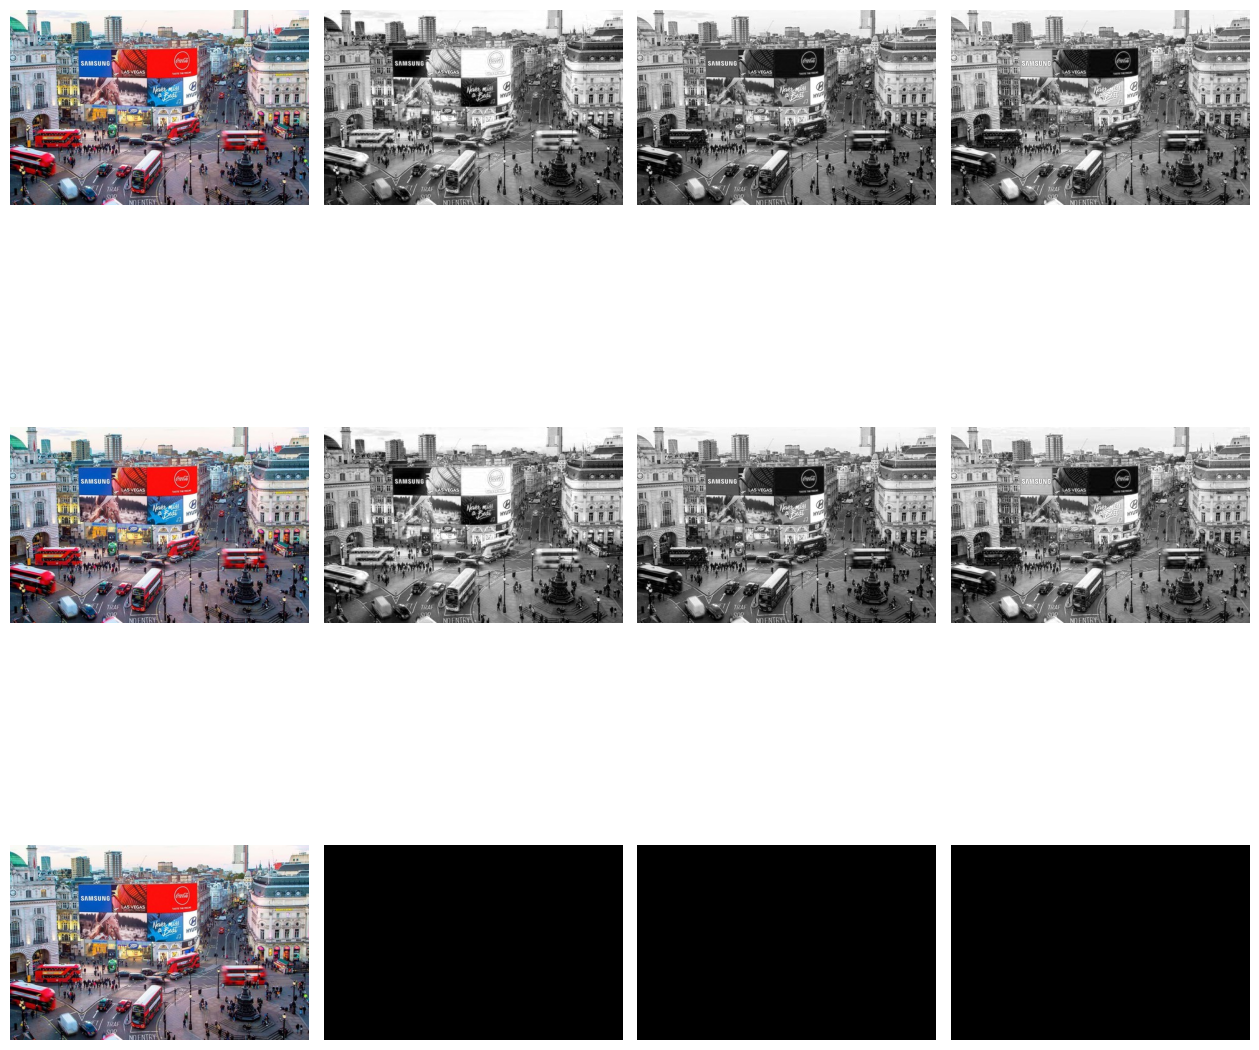

In [9]:
# przedstawienie na jednej figurze plt


plt.figure(figsize=(16, 16))
plt.subplot(3,4,1) 
plt.imshow(im)
plt.axis('off')
plt.subplot(3,4,2)
plt.imshow(im_r, "gray")
plt.axis('off')
plt.subplot(3,4,3)
plt.imshow(im_g, "gray")
plt.axis('off')
plt.subplot(3,4,4)
plt.imshow(im_b, "gray")
plt.axis('off')
plt.subplot(3,4,5)
plt.imshow(im)
plt.axis('off')
plt.subplot(3,4,6)
plt.imshow(r, "gray")
plt.axis('off')
plt.subplot(3,4,7)
plt.imshow(g, "gray")
plt.axis('off')
plt.subplot(3,4,8)
plt.imshow(b, "gray")
plt.axis('off')
plt.subplot(3,4,9)
plt.imshow(im)
plt.axis('off')
plt.subplot(3,4,10)
plt.imshow(diff_r, "gray")
plt.axis('off')
plt.subplot(3,4,11)
plt.imshow(diff_g, "gray")
plt.axis('off')
plt.subplot(3,4,12)
plt.imshow(diff_b, "gray")
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()


Łaczenie kanałow w jeden obraz RGB

In [10]:
im1 = Image.merge('RGB', (im_r, im_g, im_b))
im2 = Image.merge('RGB', (r, g, b)) 
im3 = Image.merge('RGB', (r, im_g, b))

# Czy otrzymane obrazy im1, im2, im3 są identyczne?


statystyki i histogram

In [11]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe



In [12]:
statystyki(ImageChops.difference(im1,im3))

extrema  [(0, 0), (0, 0), (0, 0)]
count  [150720, 150720, 150720]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


In [13]:
statystyki(ImageChops.difference(im1,im2))

extrema  [(0, 0), (0, 0), (0, 0)]
count  [150720, 150720, 150720]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


In [14]:
statystyki(ImageChops.difference(im2,im3))

extrema  [(0, 0), (0, 0), (0, 0)]
count  [150720, 150720, 150720]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


In [15]:
hist = im.histogram()
print(len(hist))
print(len(hist[:256]))
print(len(hist[256:2 * 256]))
print(len(hist[2 * 256:]))

768
256
256
256


In [16]:
def rysuj_histogram_RGB(obraz):
    hist = obraz.histogram()
    plt.title("histogram  ")
    # plt.bar(range(768), hist)
    plt.bar(range(256), hist[:256], color='r', alpha=0.5)
    plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
    plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
    plt.show()

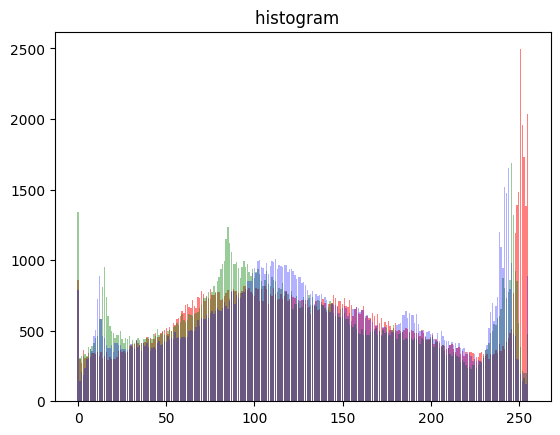

In [17]:
rysuj_histogram_RGB(im)

In [18]:
hist = r.histogram()
print(len(hist))


256


In [19]:
# ile jest pikseli w kolorze 120 w obrazie r ?
print(hist[120])

723


In [20]:
def rysuj_histogram(obraz):
    hist = obraz.histogram()
    plt.title("histogram  ")
    plt.bar(range(256), hist[:])
    plt.show()

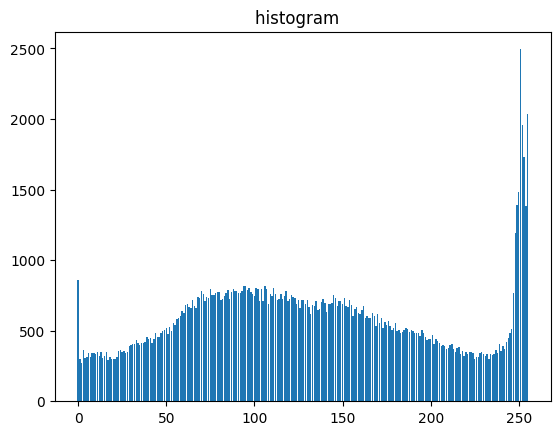

In [21]:
rysuj_histogram(r)

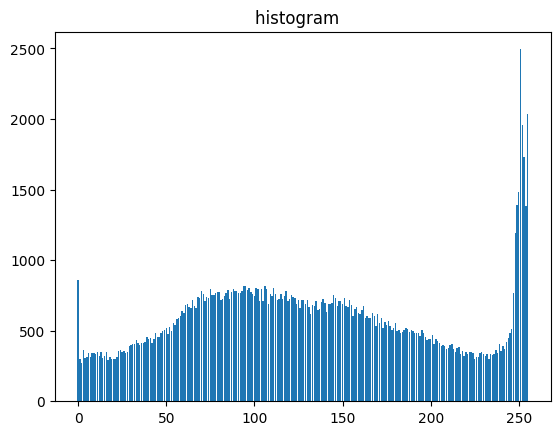

In [22]:
rysuj_histogram(im_r)

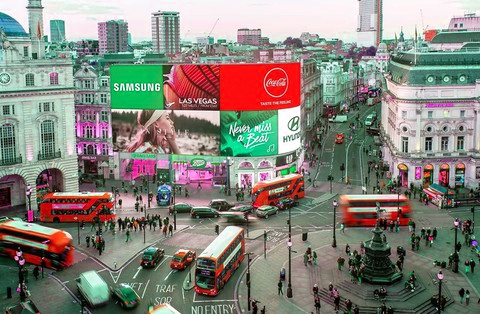

In [23]:
# efekt przestawienia  kanałow
im3 = Image.merge('RGB', (r, b, g))
im3

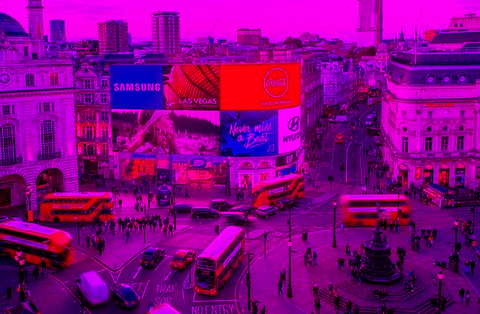

In [24]:
# własny obraz w trybie L jako kanał
t = (h, w)
A = np.zeros(t, dtype=np.uint8)
A_im = Image.fromarray(A) # czarny obraz 
im4 = Image.merge('RGB', (r, A_im, b))
im4

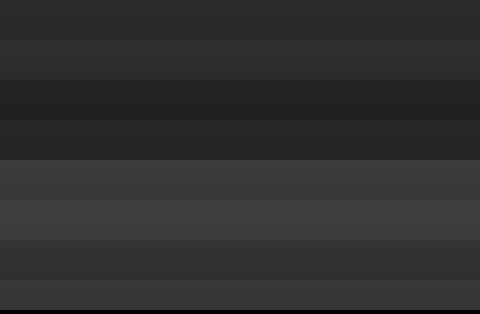

In [25]:
# własny obraz w trybie L jako kanał - drugi przykład
def rysuj_pasy_poziome_szare(w, h, grub, zmiana_koloru):  
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    ile = int(h / grub)
    for k in range(ile):
        for g in range(grub):
            i = k * grub + g
            for j in range(w):
                tab[i, j] = (k^3 + zmiana_koloru) % 256
    return Image.fromarray(tab)


im_paski = rysuj_pasy_poziome_szare(w, h, 10, 40)
im_paski



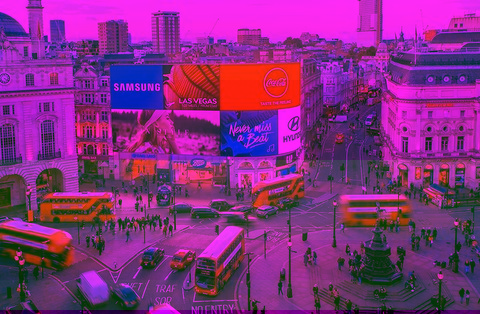

In [26]:
im5 = Image.merge('RGB', (r, im_paski, b))
im5